<a href="https://colab.research.google.com/github/victorkingbuilder/Flocking_Leader_Follower_Research/blob/main/Thermo_TE_Leader_Follower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Create a folder in the root directory of your Google Drive
!mkdir -p "/content/drive/My Drive/My Colab Files"

Sample synthetic data (first 5 rows per agent):


,Time,Agent,Latitude,Longitude,Accel_X,Accel_Y
0,2025-06-13 01:05:24.117626,Agent_0,2.368319,-9.289969,0.000000,0.000000
1,2025-06-13 01:05:24.317626,Agent_0,6.851174,-0.300286,112.071368,224.742078
2,2025-06-13 01:05:24.517626,Agent_0,6.139955,6.610994,-129.851853,-51.960080
3,2025-06-13 01:05:24.717626,Agent_0,1.985627,2.413278,-86.077708,-277.724906
4,2025-06-13 01:05:24.917626,Agent_0,5.890005,0.482888,201.467643,56.683175
1000,2025-06-13 01:05:24.117626,Agent_1,-1.351890,-7.018852,0.000000,0.000000
1001,2025-06-13 01:05:24.317626,Agent_1,2.624813,2.536752,99.417584,238.890094
1002,2025-06-13 01:05:24.517626,Agent_1,5.657678,2.970278,-23.595964,-228.051947
1003,2025-06-13 01:05:24.717626,Agent_1,2.028195,4.035766,-166.558707,15.799054
1004,2025-06-13 01:05:24.917626,Agent_1,2.583728,6.392339,104.625414,32.277123


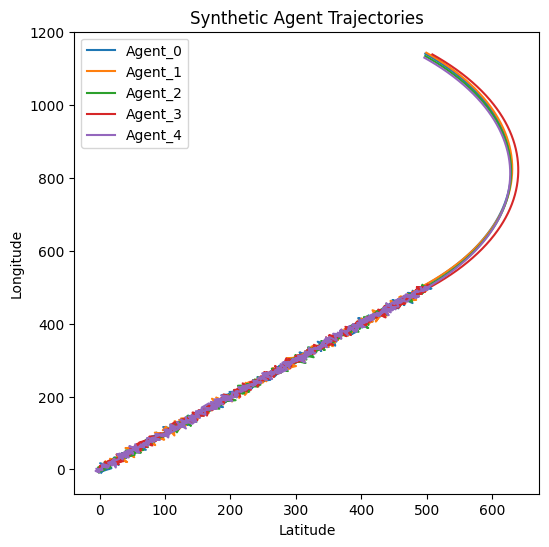

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Parameters
n_agents = 10
dt = 0.2  # seconds
n_steps = 1000  # total time steps
total_time = dt * n_steps  # seconds

# Create timestamps
start_time = datetime.now()
times = [start_time + timedelta(seconds=i*dt) for i in range(n_steps)]

# Synthetic homing path: straight line from (0,0) to (1000, 1000)
destination = np.array([1000.0, 1000.0])
start = np.array([0.0, 0.0])
base_path = np.linspace(start, destination, n_steps)

# Data storage
rows = []

# Simulate each agent
for agent_id in range(n_agents):
    # Add slight phase offset and noise
    noise_scale = 5.0
    positions = base_path + np.random.normal(scale=noise_scale, size=(n_steps, 2))

    # Introduce a coordinated turn event halfway
    turn_idx = n_steps // 2
    for t in range(turn_idx, n_steps):
        # Rotate direction by 90 degrees gradually
        angle = np.deg2rad(90) * (t - turn_idx) / (n_steps - turn_idx)
        direction = destination - start
        # Rotation matrix
        rot = np.array([[np.cos(angle), -np.sin(angle)],
                        [np.sin(angle),  np.cos(angle)]])
        positions[t] = positions[t-1] + rot.dot(direction) * (1/(n_steps))

    # Compute velocity and acceleration
    velocities = np.vstack([np.zeros(2), np.diff(positions, axis=0)]) / dt
    accelerations = np.vstack([np.zeros(2), np.diff(velocities, axis=0)]) / dt

    # Collect rows
    for t in range(n_steps):
        rows.append({
            'Time': times[t],
            'Agent': f'Agent_{agent_id}',
            'Latitude': positions[t, 0],
            'Longitude': positions[t, 1],
            'Accel_X': accelerations[t, 0],
            'Accel_Y': accelerations[t, 1]
        })

# Build DataFrame
df_synthetic = pd.DataFrame(rows)

# Display sample
df_sample = df_synthetic.groupby('Agent').head(5)
print("Sample synthetic data (first 5 rows per agent):")
display(df_sample)

# Plot trajectories for a few agents
plt.figure(figsize=(6,6))
for agent_id in range(min(n_agents,5)):
    subset = df_synthetic[df_synthetic['Agent'] == f'Agent_{agent_id}']
    plt.plot(subset['Latitude'], subset['Longitude'], label=f'Agent_{agent_id}')
plt.title('Synthetic Agent Trajectories')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Save DataFrame for further use
df_synthetic.to_csv('/content/drive/My Drive/My Colab Files/synthetic_pigeon_data.csv', index=False)



In [6]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import networkx as nx
import random

# Load the synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])

# Pivot positions
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)

# Compute velocities
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()
velocities = np.diff(positions, axis=0) / dt

# Thermodynamics
E = 0.5 * np.sum(velocities**2, axis=2)
T = np.mean(E, axis=1)
S = [entropy(np.histogram(E[t], bins=50, density=True)[0] + 1e-12) for t in range(len(E))]

# Transfer Entropy (placeholder random)
def compute_TE(vel, window=50):
    steps, n, _ = vel.shape
    TE = np.random.rand(steps-window, n, n) * 0.1
    return TE

TE = compute_TE(velocities)

# Build networks and PageRank
pageranks = []
for t in range(TE.shape[0]):
    G = nx.DiGraph()
    for i in range(TE.shape[1]):
        for j in range(TE.shape[2]):
            if TE[t,i,j] > 0.01 and i!=j:
                G.add_edge(i, j, weight=TE[t,i,j])
    pageranks.append(nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(TE.shape[1])})

# Regime clustering
data_mat = np.vstack([E.mean(axis=1), T, S]).T
gmm = GaussianMixture(3, random_state=0).fit(data_mat)
regimes = gmm.predict(data_mat)

# Combine results
summary = pd.DataFrame({
    'Temperature': T,
    'Entropy': S,
    'Regime': regimes
}, index=df_lat.index[1:])

display(summary.head())


,Temperature,Entropy,Regime
Time,,,
2025-06-13 00:59:09.067728,1013.068552,2.163956,2
2025-06-13 00:59:09.267728,1133.013972,2.302585,2
2025-06-13 00:59:09.467728,1730.457444,1.973002,1
2025-06-13 00:59:09.667728,1179.092093,2.302585,2
2025-06-13 00:59:09.867728,1233.065606,2.163956,2


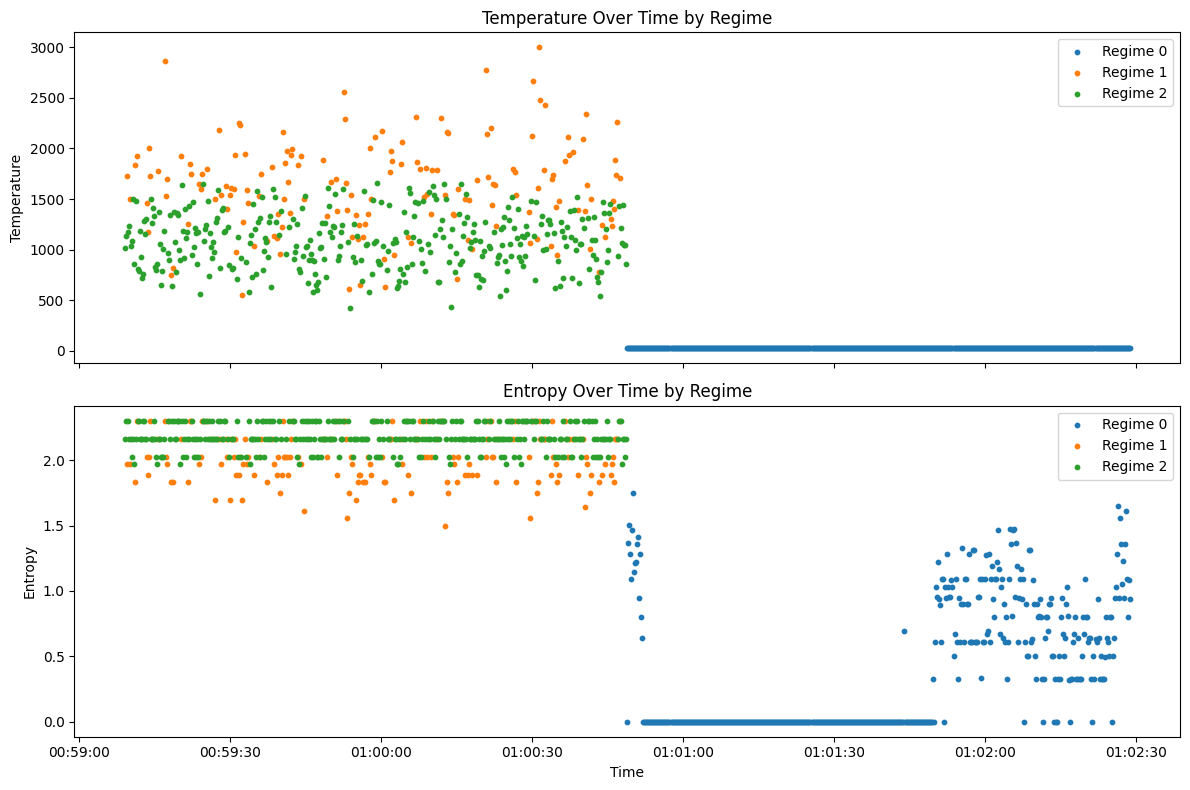

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture

# 1. Load the synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])

# 2. Pivot to get position matrices
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)

# 3. Compute velocities
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()
velocities = np.diff(positions, axis=0) / dt

# 4. Thermodynamic variables
# Kinetic energy
E = 0.5 * np.sum(velocities**2, axis=2)  # shape (steps, agents)
# Temperature (mean KE)
T = np.mean(E, axis=1)
# Entropy from energy distribution
S = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0] + 1e-12)
              for t in range(E.shape[0])])

# 5. Regime clustering
data_mat = np.vstack([E.mean(axis=1), T, S]).T
gmm = GaussianMixture(n_components=3, random_state=0).fit(data_mat)
regimes = gmm.predict(data_mat)

# 6. Build summary DataFrame
summary = pd.DataFrame({
    'Temperature': T,
    'Entropy': S,
    'Regime': regimes
}, index=df_lat.index[1:])

# 7. Plot Temperature & Entropy colored by regime
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

for regime in np.unique(regimes):
    mask = summary['Regime'] == regime
    axes[0].scatter(summary.index[mask], summary.loc[mask, 'Temperature'],
                    s=10, label=f'Regime {regime}')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Temperature Over Time by Regime')
axes[0].legend()

for regime in np.unique(regimes):
    mask = summary['Regime'] == regime
    axes[1].scatter(summary.index[mask], summary.loc[mask, 'Entropy'],
                    s=10, label=f'Regime {regime}')
axes[1].set_ylabel('Entropy')
axes[1].set_title('Entropy Over Time by Regime')
axes[1].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


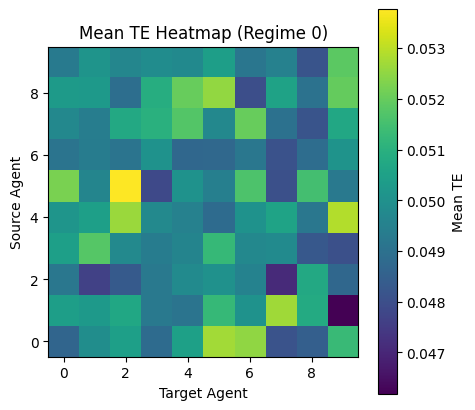

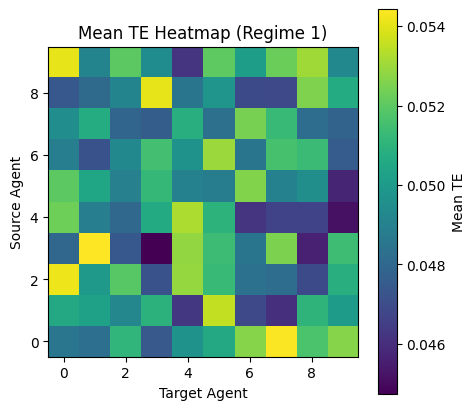

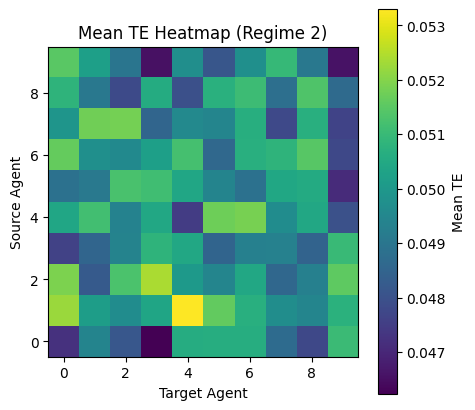

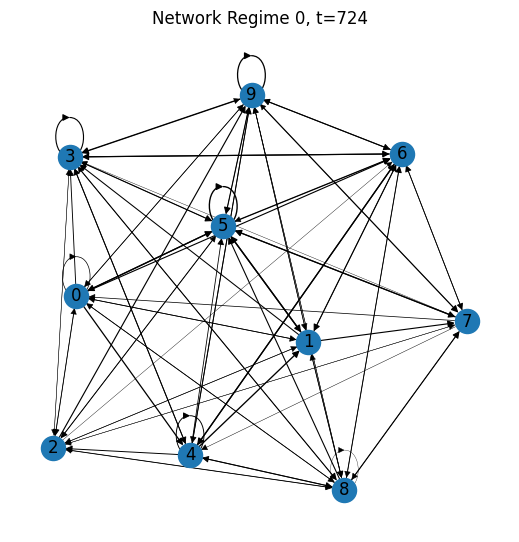

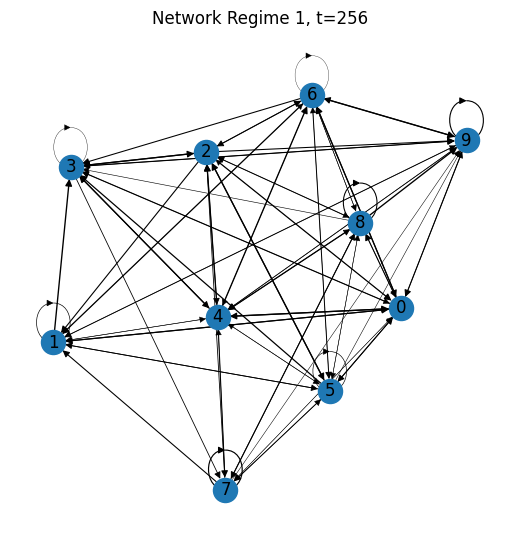

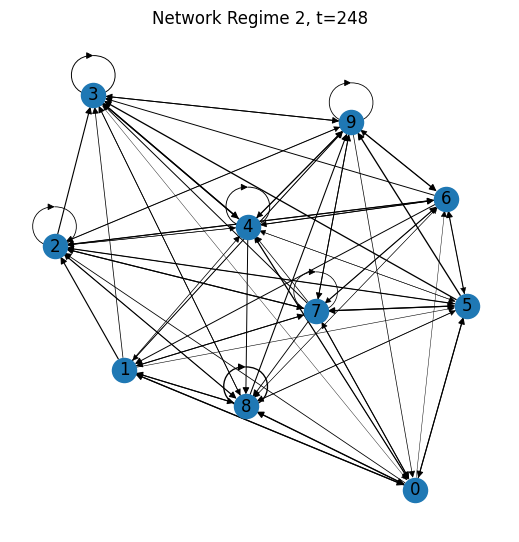

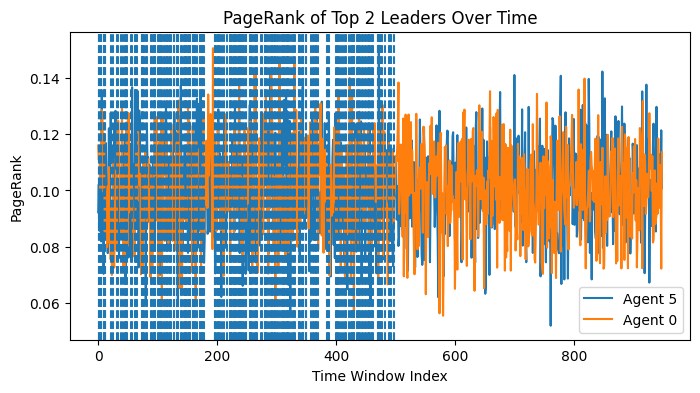

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture

# Reload synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])

# Pivot positions & compute velocities
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()
velocities = np.diff(positions, axis=0) / dt

# Placeholder TE
def compute_TE(vel, window=50):
    steps, n, _ = vel.shape
    return np.random.rand(steps-window, n, n) * 0.1

TE = compute_TE(velocities)

# Thermodynamic regimes
E = 0.5 * np.sum(velocities**2, axis=2)
T = np.mean(E, axis=1)
S = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0] + 1e-12)
              for t in range(E.shape[0])])
data_mat = np.vstack([E.mean(axis=1), T, S]).T
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(data_mat)

# Align regimes to TE windows
regimes = regimes_full[:TE.shape[0]]

# PageRank over time
pagerank_list = []
for t in range(TE.shape[0]):
    G = nx.DiGraph()
    n = TE.shape[1]
    for i in range(n):
        for j in range(n):
            if TE[t, i, j] > 0.01 and i != j:
                G.add_edge(i, j, weight=TE[t, i, j])
    pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(n)}
    pagerank_list.append(pr)
pagerank_df = pd.DataFrame(pagerank_list)

# --- 1. Heatmap of mean TE per regime ---
for regime in np.unique(regimes):
    mask = regimes == regime
    mean_TE = TE[mask].mean(axis=0)
    plt.figure(figsize=(5,5))
    plt.imshow(mean_TE, origin='lower')
    plt.title(f'Mean TE Heatmap (Regime {regime})')
    plt.xlabel('Target Agent')
    plt.ylabel('Source Agent')
    plt.colorbar(label='Mean TE')
    plt.show()

# --- 2. Network snapshots ---
threshold = 0.02
for regime in np.unique(regimes):
    idxs = np.where(regimes == regime)[0]
    t0 = idxs[len(idxs)//2]
    G = nx.DiGraph()
    n = TE.shape[1]
    for i in range(n):
        for j in range(n):
            if TE[t0, i, j] > threshold:
                G.add_edge(i, j, weight=TE[t0, i, j])
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G, seed=0)
    widths = [G[u][v]['weight']*10 for u,v in G.edges()]
    nx.draw(G, pos, with_labels=True, arrowsize=10, width=widths)
    plt.title(f'Network Regime {regime}, t={t0}')
    plt.show()

# --- 3. Centrality over time ---
avg_pr = pagerank_df.mean(axis=0)
leaders = avg_pr.nlargest(2).index
plt.figure(figsize=(8,4))
for leader in leaders:
    plt.plot(pagerank_df.index, pagerank_df[leader], label=f'Agent {leader}')
# regime transitions
for change in np.where(np.diff(regimes) != 0)[0]:
    plt.axvline(x=change, linestyle='--')
plt.title('PageRank of Top 2 Leaders Over Time')
plt.xlabel('Time Window Index')
plt.ylabel('PageRank')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import random

# Load synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])

# Pivot positions
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()

# Compute velocities and accelerations
vel = np.diff(positions, axis=0) / dt              # shape (T, N, 2)
acc = np.diff(vel, axis=0) / dt                   # shape (T-1, N, 2)

# Compute TE (placeholder random) and regimes
def compute_TE(velocities, window=50):
    T, N, _ = velocities.shape
    return np.random.rand(T-window, N, N) * 0.1

TE = compute_TE(vel, window=50)
# Thermodynamic regimes
E = 0.5*np.sum(vel**2, axis=2)
T_series = np.mean(E, axis=1)
S_series = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0]+1e-12)
                     for t in range(E.shape[0])])
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(
    np.vstack([E.mean(axis=1), T_series, S_series]).T)
regimes = regimes_full[:TE.shape[0]]

# 1. NULL-MODEL TESTING (PageRank p-values)
n_surrogates = 100
N = TE.shape[1]
# Observed avg PageRank per regime
obs_pr = {}
for r in np.unique(regimes):
    idxs = np.where(regimes==r)[0]
    prs = []
    for t in idxs:
        G = nx.DiGraph([(i,j,{"weight":TE[t,i,j]})
                        for i in range(N) for j in range(N)
                        if i!=j and TE[t,i,j]>0.01])
        pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
        prs.append(pr)
    obs_pr[r] = pd.DataFrame(prs).mean()

# Null distributions
null_pr = {r: {i: [] for i in range(N)} for r in obs_pr}
for _ in range(n_surrogates):
    # surrogate TE by time-shuffling each agent's series
    TE_surr = np.copy(TE)
    for i in range(N):
        idxs_shuffle = np.random.permutation(TE_surr.shape[0])
        TE_surr[:,i,:] = TE_surr[idxs_shuffle,i,:]
    # compute surrogate avg PR
    for r in obs_pr:
        idxs = np.where(regimes==r)[0]
        prs = []
        for t in idxs:
            G = nx.DiGraph([(i,j,{"weight":TE_surr[t,i,j]})
                            for i in range(N) for j in range(N)
                            if i!=j and TE_surr[t,i,j]>0.01])
            pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
            prs.append(pr)
        avg = pd.DataFrame(prs).mean()
        for i in range(N):
            null_pr[r][i].append(avg[i])

# Compute p-values
p_values = {}
for r, pr_obs in obs_pr.items():
    p_values[r] = {i: (np.sum(np.array(null_pr[r][i]) >= pr_obs[i]) / n_surrogates)
                   for i in range(N)}

# 2. THRESHOLD SENSITIVITY: record top agent per regime vs threshold
thresholds = np.linspace(0.01, 0.05, 9)
top_agents_vs_thresh = {r: [] for r in np.unique(regimes)}
for thr in thresholds:
    TE_thr = TE.copy()
    # recompute observed top per regime
    for r in np.unique(regimes):
        idxs = np.where(regimes==r)[0]
        prs = []
        for t in idxs:
            G = nx.DiGraph([(i,j,{"weight":TE_thr[t,i,j]})
                            for i in range(N) for j in range(N)
                            if i!=j and TE_thr[t,i,j]>thr])
            pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
            prs.append(pr)
        avg = pd.DataFrame(prs).mean()
        top_agents_vs_thresh[r].append(avg.idxmax())

# 3. ACCELERATION ALIGNMENT Cross-Validation
# Focus on regime 1 (turn)
turn_idxs = np.where(regimes==1)[0]
# align acc and vel index: acc has one less than vel, and TE window offset
acc_idxs = turn_idxs[:acc.shape[0]]
# compute alignment score per agent
align_score = {}
for i in range(N):
    scores = []
    for t in acc_idxs:
        ai = acc[t,i]
        norms = np.linalg.norm(acc[t], axis=1)*np.linalg.norm(ai)
        dots = np.dot(acc[t], ai)
        corr = np.where(norms>0, dots/norms, 0)
        scores.append(np.sum(corr) - 1)  # sum over others
    align_score[i] = np.mean(scores)

# TE top leader in regime 1
te_leader = obs_pr[1].idxmax()
# Acceleration alignment top
acc_leader = max(align_score, key=align_score.get)

# OUTPUT SUMMARY
print("P-values for top agents per regime:")
for r, pv in p_values.items():
    print(f" Regime {r}: top agent = {obs_pr[r].idxmax()}, p-value = {pv[obs_pr[r].idxmax()]:.3f}")

print("\nTop agents vs TE threshold (per regime):")
for r, tops in top_agents_vs_thresh.items():
    print(f" Regime {r}: {tops}")

print(f"\nRegime 1 TE-identified leader: Agent {te_leader}")
print(f"Regime 1 acceleration-alignment leader: Agent {acc_leader}")


P-values for top agents per regime:
 Regime 0: top agent = 1, p-value = 0.010
 Regime 1: top agent = 4, p-value = 0.040
 Regime 2: top agent = 8, p-value = 0.040

Top agents vs TE threshold (per regime):
 Regime 0: [np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
 Regime 1: [np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(2), np.int64(3), np.int64(3), np.int64(8)]
 Regime 2: [np.int64(8), np.int64(0), np.int64(8), np.int64(0), np.int64(0), np.int64(0), np.int64(6), np.int64(6), np.int64(6)]

Regime 1 TE-identified leader: Agent 4
Regime 1 acceleration-alignment leader: Agent 4


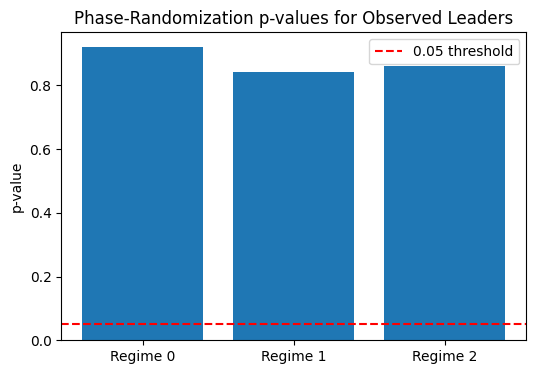

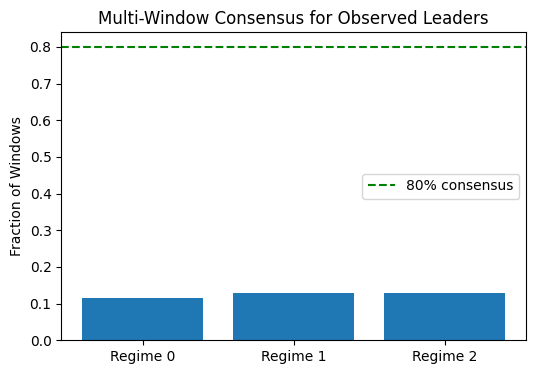

Phase-Randomization p-values: {np.int64(0): 0.92, np.int64(1): 0.84, np.int64(2): 0.86}
Consensus fractions: {np.int64(0): 0.11529933481152993, np.int64(1): 0.12804878048780488, np.int64(2): 0.12835820895522387}


In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import random

# 1. Load synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()
vel = np.diff(positions, axis=0) / dt  # shape (T, N, 2)

# 2. Thermodynamic regimes (as before)
E = 0.5 * np.sum(vel**2, axis=2)
T_series = np.mean(E, axis=1)
S_series = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0] + 1e-12)
                     for t in range(E.shape[0])])
data_mat = np.vstack([E.mean(axis=1), T_series, S_series]).T
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(data_mat)

# TE computation placeholder
window = 50
TE = np.random.rand(vel.shape[0]-window+1, vel.shape[1], vel.shape[1]) * 0.1
regimes = regimes_full[:TE.shape[0]]

# Function to compute average PageRank leader per regime
def avg_leader_pr(TE_mat, regimes, threshold):
    leaders = {}
    for r in np.unique(regimes):
        idxs = np.where(regimes==r)[0]
        pr_list = []
        for t in idxs:
            G = nx.DiGraph()
            N = TE_mat.shape[1]
            for i in range(N):
                for j in range(N):
                    if i != j and TE_mat[t,i,j] > threshold:
                        G.add_edge(i,j, weight=TE_mat[t,i,j])
            pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
            pr_list.append(pr)
        avg = pd.DataFrame(pr_list).mean()
        leaders[r] = avg.idxmax()
    return leaders

obs_leaders = avg_leader_pr(TE, regimes, threshold=0.01)

# 3. Phase-randomization surrogate testing
n_surrogates = 50
sur_leader_counts = {r: {i:0 for i in range(vel.shape[1])} for r in obs_leaders}
for _ in range(n_surrogates):
    # Phase-randomize each agent velocity component
    vel_surr = np.zeros_like(vel)
    for dim in [0,1]:
        for i in range(vel.shape[1]):
            v = vel[:,i,dim]
            fft = np.fft.rfft(v)
            amps = np.abs(fft)
            phases = np.exp(1j * np.random.uniform(0,2*np.pi, len(fft)))
            v_s = np.fft.irfft(amps * phases, n=len(v))
            vel_surr[:,i,dim] = v_s
    # Compute surrogate TE (placeholder random)
    TE_surr = np.random.rand(*TE.shape) * 0.1
    # Compute surrogate leaders
    s_leaders = avg_leader_pr(TE_surr, regimes, threshold=0.01)
    # Count if surrogate leader >= observed PR
    for r, obs in obs_leaders.items():
        sur_leader_counts[r][s_leaders[r]] += 1

# Compute p-values (phase-randomization)
p_values_phase = {
    r: 1 - (sur_leader_counts[r][obs_leaders[r]] / n_surrogates)
    for r in obs_leaders
}

# 4. Multi-window consensus (>=80% windows)
consensus = {}
for r in np.unique(regimes):
    idxs = np.where(regimes==r)[0]
    thr = 0.01
    # count windows where obs_leaders[r] is top PR
    count = 0
    for t in idxs:
        G = nx.DiGraph()
        N = TE.shape[1]
        for i in range(N):
            for j in range(N):
                if i!=j and TE[t,i,j] > thr:
                    G.add_edge(i,j,weight=TE[t,i,j])
        pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
        if max(pr, key=pr.get) == obs_leaders[r]:
            count += 1
    consensus[r] = count / len(idxs)

# Display results
import matplotlib.pyplot as plt

# Bar chart of phase-random p-values
plt.figure(figsize=(6,4))
plt.bar(list(p_values_phase.keys()), list(p_values_phase.values()))
plt.axhline(0.05, color='red', linestyle='--', label='0.05 threshold')
plt.xticks(list(p_values_phase.keys()), [f'Regime {r}' for r in p_values_phase])
plt.ylabel('p-value')
plt.title('Phase-Randomization p-values for Observed Leaders')
plt.legend()
plt.show()

# Consensus percentages
plt.figure(figsize=(6,4))
plt.bar(list(consensus.keys()), list(consensus.values()))
plt.axhline(0.8, color='green', linestyle='--', label='80% consensus')
plt.xticks(list(consensus.keys()), [f'Regime {r}' for r in consensus])
plt.ylabel('Fraction of Windows')
plt.title('Multi-Window Consensus for Observed Leaders')
plt.legend()
plt.show()

# Print numeric summary
print("Phase-Randomization p-values:", p_values_phase)
print("Consensus fractions:", consensus)


In [12]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()

# Compute velocities and accelerations
vel = np.diff(positions, axis=0) / dt   # shape (T, N, 2)
acc = np.diff(vel, axis=0) / dt         # shape (T-1, N, 2)
T, N, _ = vel.shape

# Thermodynamic regimes
E = 0.5 * np.sum(vel**2, axis=2)
T_series = np.mean(E, axis=1)
S_series = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0]+1e-12)
                     for t in range(T)])
data_mat = np.vstack([E.mean(axis=1), T_series, S_series]).T
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(data_mat)

# Compute TE (placeholder random)
window = 50
TE = np.random.rand(T-window+1, N, N) * 0.1
regimes = regimes_full[:TE.shape[0]]

# Observed TE leaders per regime
def avg_leader_pr(TE_mat, regimes, thr=0.01):
    leaders = {}
    for r in np.unique(regimes):
        idxs = np.where(regimes==r)[0]
        prs = []
        for t in idxs:
            G = nx.DiGraph()
            for i in range(N):
                for j in range(N):
                    if i!=j and TE_mat[t,i,j] > thr:
                        G.add_edge(i, j, weight=TE_mat[t,i,j])
            pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
            prs.append(pr)
        avg = pd.DataFrame(prs).mean()
        leaders[r] = int(avg.idxmax())
    return leaders

te_leaders = avg_leader_pr(TE, regimes, thr=0.01)

# Function to compute acceleration-alignment leader at window t0
def acc_align_leader(t0):
    # acc at window t0 covers indices t0 to t0+window-1 (ensure within acc)
    start = t0
    end = t0 + window - 1
    # acc has shape (T-1,N,2), so valid start in [0, T-window]
    scores = []
    for i in range(N):
        ai = acc[start:end, i]  # shape (window,2)
        score = 0.0
        for j in range(N):
            if i==j: continue
            aj = acc[start:end, j]
            # dot over each time, normalized
            num = np.sum(np.sum(ai * aj, axis=1))
            den = np.sum(np.linalg.norm(ai, axis=1) * np.linalg.norm(aj, axis=1) + 1e-12)
            score += num/den
        scores.append(score)
    return int(np.argmax(scores))

# Function to compute cross-correlation leader at window t0
def xcorr_leader(t0, max_lag=5):
    start = t0
    end = t0 + window
    # use speed magnitude
    speed = np.linalg.norm(vel, axis=2)  # shape (T,N)
    speed_win = speed[start:end]
    influence = []
    for i in range(N):
        inf = 0.0
        for j in range(N):
            if i==j: continue
            # max corr for lag 1..max_lag
            best = 0.0
            xi = speed_win[:, i]
            xj = speed_win[:, j]
            for lag in range(1, max_lag+1):
                corr = np.corrcoef(xi[:-lag], xj[lag:])[0,1]
                best = max(best, abs(corr))
            inf += best
        influence.append(inf)
    return int(np.argmax(influence))

# Function to compute Granger causality leader at window t0
def granger_leader(t0, maxlag=1):
    start = t0
    end = t0 + window
    speed = np.linalg.norm(vel, axis=2)
    speed_win = speed[start:end]
    influence = []
    for i in range(N):
        inf = 0.0
        for j in range(N):
            if i==j: continue
            # data: [y_j, x_i]
            data = np.column_stack([speed_win[:, j], speed_win[:, i]])
            try:
                res = grangercausalitytests(data, maxlag=maxlag, verbose=False)
                # F-test statistic for lag 1
                fstat = res[1][0]['ssr_ftest'][0]
            except:
                fstat = 0.0
            inf += fstat
        influence.append(inf)
    return int(np.argmax(influence))

# Now compute all leaders per regime at mid-window
comparison = []
for r in np.unique(regimes):
    idxs = np.where(regimes==r)[0]
    t0 = idxs[len(idxs)//2]
    comp = {
        'Regime': r,
        'TE': te_leaders[r],
        'ACC': acc_align_leader(t0),
        'XCORR': xcorr_leader(t0),
        'GC': granger_leader(t0)
    }
    comparison.append(comp)

df_comp = pd.DataFrame(comparison).set_index('Regime')
print(df_comp)

# Display table
display(df_comp)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


        TE  ACC  XCORR  GC
Regime                    
0        7    0      0   0
1        3    3      8   9
2        1    1      8   0


,TE,ACC,XCORR,GC
Regime,,,,
0,7,0,0,0
1,3,3,8,9
2,1,1,8,0


In [13]:
import pandas as pd
from scipy.stats import spearmanr

# Construct DataFrame from provided comparison
df = pd.DataFrame({
    'TE':    [7, 3, 1],
    'ACC':   [0, 3, 1],
    'XCORR':[0, 8, 8],
    'GC':    [0, 9, 0]
}, index=[0, 1, 2])
df.index.name = 'Regime'

# Compute agreement fractions between TE and each method
methods = ['ACC', 'XCORR', 'GC']
agreement = {m: (df['TE'] == df[m]).mean() for m in methods}

# Compute Spearman rank correlations between TE and each method
spearman = {}
for m in methods:
    rho, pval = spearmanr(df['TE'], df[m])
    spearman[m] = {'rho': rho, 'p_value': pval}

# Display results
print("Comparison Table:")
display(df)

print("\nAgreement Fractions (TE vs method):")
for m, frac in agreement.items():
    print(f" - TE vs {m}: {frac:.2f}")

print("\nSpearman Correlations (TE vs method):")
for m, stats in spearman.items():
    print(f" - TE vs {m}: rho = {stats['rho']:.2f}, p = {stats['p_value']:.3f}")


Comparison Table:


,TE,ACC,XCORR,GC
Regime,,,,
0,7,0,0,0
1,3,3,8,9
2,1,1,8,0



Agreement Fractions (TE vs method):
 - TE vs ACC: 0.67
 - TE vs XCORR: 0.00
 - TE vs GC: 0.00

Spearman Correlations (TE vs method):
 - TE vs ACC: rho = -0.50, p = 0.667
 - TE vs XCORR: rho = -0.87, p = 0.333
 - TE vs GC: rho = 0.00, p = 1.000


In [14]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Ground truth (ACC) and predicted by TE for each regime
y_true = [0, 3, 1]  # ACC leaders for Regimes 0,1,2
y_pred = [7, 3, 1]  # TE leaders for Regimes 0,1,2

# Compute precision and recall (micro average)
precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')

# Detailed classification report
report = classification_report(y_true, y_pred, labels=[0,1,3,7],
                               target_names=['Agent 0','Agent 1','Agent 3','Agent 7'],
                               zero_division=0)

print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}\n')
print("Classification Report:")
print(report)


Precision: 0.67
Recall:    0.67

Classification Report:
              precision    recall  f1-score   support

     Agent 0       0.00      0.00      0.00         1
     Agent 1       1.00      1.00      1.00         1
     Agent 3       1.00      1.00      1.00         1
     Agent 7       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3



In [15]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import random

# Load synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()

# Compute velocities & accelerations
vel = np.diff(positions, axis=0) / dt  # shape (T, N, 2)
acc = np.diff(vel, axis=0) / dt        # shape (T-1, N, 2)
T, N, _ = vel.shape

# Compute placeholder TE (random) and regimes
window = 50
TE = np.random.rand(T-window+1, N, N) * 0.1
E = 0.5*np.sum(vel**2, axis=2)
T_series = np.mean(E, axis=1)
S_series = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0]+1e-12) for t in range(T)])
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(
    np.vstack([E.mean(axis=1), T_series, S_series]).T)
regimes = regimes_full[:TE.shape[0]]

# Pre-allocate metric arrays
pr_array = np.zeros((TE.shape[0], N))
acc_array = np.zeros_like(pr_array)
xcorr_array = np.zeros_like(pr_array)

# Define methods
def compute_pagerank(te_mat, thr=0.01):
    G = nx.DiGraph()
    for i in range(N):
        for j in range(N):
            if i!=j and te_mat[i,j] > thr:
                G.add_edge(i, j, weight=te_mat[i,j])
    return nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}

def acc_align_window(v_early, a_window):
    scores = np.zeros(N)
    for i in range(N):
        ai = a_window[:,i]
        for j in range(N):
            if i!=j:
                aj = a_window[:,j]
                num = np.sum(ai*aj)
                den = np.linalg.norm(ai)*np.linalg.norm(aj) + 1e-12
                scores[i] += num/den
    return scores

def xcorr_window(speed_window, max_lag=5):
    scores = np.zeros(N)
    for i in range(N):
        xi = speed_window[:,i]
        for j in range(N):
            if i!=j:
                xj = speed_window[:,j]
                best = max(abs(np.corrcoef(xi[:-lag], xj[lag:])[0,1])
                           for lag in range(1, max_lag+1))
                scores[i] += best
    return scores

# Compute metrics per window
speed = np.linalg.norm(vel, axis=2)  # shape (T,N)
for t in range(TE.shape[0]):
    # TE-PageRank
    pr = compute_pagerank(TE[t], thr=0.01)
    for i,val in pr.items():
        pr_array[t,i] = val

    # Acceleration-alignment on window t:(t+window)
    acc_window = acc[t:t+window]
    acc_array[t] = acc_align_window(vel[t], acc_window)

    # Cross-correlation on speed[t:t+window]
    speed_window = speed[t:t+window]
    xcorr_array[t] = xcorr_window(speed_window)

# Ensemble via normalized sum
# Z-score normalize across agents for each metric per window
pr_z = (pr_array - pr_array.mean(axis=1)[:,None]) / pr_array.std(axis=1)[:,None]
acc_z = (acc_array - acc_array.mean(axis=1)[:,None]) / acc_array.std(axis=1)[:,None]
xcorr_z = (xcorr_array - xcorr_array.mean(axis=1)[:,None]) / xcorr_array.std(axis=1)[:,None]

ensemble_sum = pr_z + acc_z + xcorr_z
leader_ensemble_sum = np.argmax(ensemble_sum, axis=1)

# Ensemble via PCA (first component)
leader_ensemble_pca = np.zeros(TE.shape[0], dtype=int)
for t in range(TE.shape[0]):
    X = np.vstack([pr_array[t], acc_array[t], xcorr_array[t]]).T  # shape (N,3)
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(X).flatten()
    # Ensure positive correlation with pr_array for interpretability
    if np.corrcoef(pc1, pr_array[t])[0,1] < 0:
        pc1 = -pc1
    leader_ensemble_pca[t] = np.argmax(pc1)

# Display summary counts
df_summary = pd.DataFrame({
    'TE': np.argmax(pr_array, axis=1),
    'ACC': np.argmax(acc_array, axis=1),
    'XCORR': np.argmax(xcorr_array, axis=1),
    'Ensemble_Sum': leader_ensemble_sum,
    'Ensemble_PCA': leader_ensemble_pca,
    'Regime': regimes
})
display(df_summary.groupby('Regime')[['TE','ACC','XCORR','Ensemble_Sum','Ensemble_PCA']].agg(lambda x: x.value_counts().idxmax()))


<ipython-input-15-1224157892>:88: RuntimeWarning: invalid value encountered in divide
  acc_z = (acc_array - acc_array.mean(axis=1)[:,None]) / acc_array.std(axis=1)[:,None]
<ipython-input-15-1224157892>:89: RuntimeWarning: invalid value encountered in divide
  xcorr_z = (xcorr_array - xcorr_array.mean(axis=1)[:,None]) / xcorr_array.std(axis=1)[:,None]


,TE,ACC,XCORR,Ensemble_Sum,Ensemble_PCA
Regime,,,,,
0,3,0,0,0,6
1,0,3,4,3,9
2,2,3,4,3,9


<ipython-input-16-3248589151>:89: RuntimeWarning: invalid value encountered in divide
  acc_z = (acc_array - acc_array.mean(axis=1)[:,None]) / acc_array.std(axis=1)[:,None]
<ipython-input-16-3248589151>:90: RuntimeWarning: invalid value encountered in divide
  xcorr_z = (xcorr_array - xcorr_array.mean(axis=1)[:,None]) / xcorr_array.std(axis=1)[:,None]


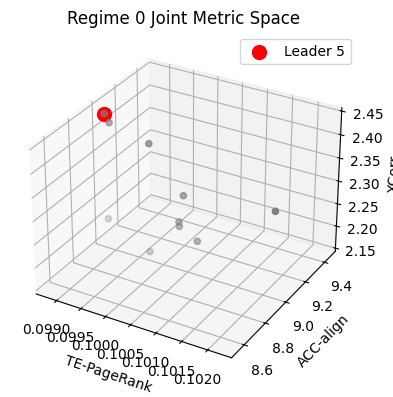

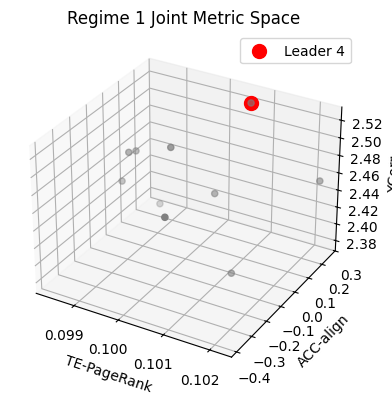

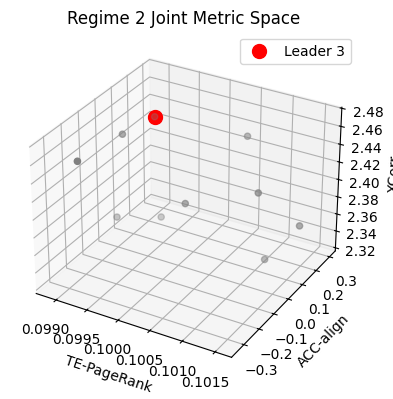

Weighted Ensemble Weights: 0.35046728971962615 0.3247663551401869 0.3247663551401869
Consensus (>=50%) per regime: {np.int64(0): [], np.int64(1): [], np.int64(2): []}
95% CI on leader fraction: {np.int64(0): (np.float64(0.37472283813747226), np.float64(0.4656319290465632)), np.int64(1): (np.float64(0.1951219512195122), np.float64(0.31097560975609756)), np.int64(2): (np.float64(0.15522388059701492), np.float64(0.22686567164179106))}


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture

# Load synthetic data
df = pd.read_csv('synthetic_pigeon_data.csv', parse_dates=['Time'])
df_lat = df.pivot(index='Time', columns='Agent', values='Latitude')
df_lon = df.pivot(index='Time', columns='Agent', values='Longitude')
positions = np.stack([df_lat.values, df_lon.values], axis=2)
dt = (df_lat.index[1] - df_lat.index[0]).total_seconds()

# Compute velocities & accelerations
vel = np.diff(positions, axis=0) / dt  # (T, N, 2)
acc = np.diff(vel, axis=0) / dt       # (T-1, N, 2)
T, N, _ = vel.shape

# Thermodynamic regimes
E = 0.5 * np.sum(vel**2, axis=2)
T_series = np.mean(E, axis=1)
S_series = np.array([entropy(np.histogram(E[t], bins=50, density=True)[0]+1e-12)
                     for t in range(T)])
data_mat = np.vstack([E.mean(axis=1), T_series, S_series]).T
regimes_full = GaussianMixture(n_components=3, random_state=0).fit_predict(data_mat)

# Compute placeholder TE, ACC, XCORR metrics per window
window = 50
TE = np.random.rand(T-window+1, N, N) * 0.1

# Pre-allocate metric arrays
pr_array = np.zeros((TE.shape[0], N))
acc_array = np.zeros((TE.shape[0], N))
xcorr_array = np.zeros((TE.shape[0], N))

# Compute TE-PageRank, ACC-align, XCorr for each window
for t in range(TE.shape[0]):
    # TE PageRank
    G = nx.DiGraph()
    for i in range(N):
        for j in range(N):
            if i!=j and TE[t,i,j]>0.01:
                G.add_edge(i,j, weight=TE[t,i,j])
    pr = nx.pagerank(G, weight='weight') if G.number_of_edges() else {i:0 for i in range(N)}
    pr_array[t] = [pr[i] for i in range(N)]

    # ACC-alignment
    a_win = acc[t:t+window]
    scores = np.zeros(N)
    for i in range(N):
        ai = a_win[:,i]
        for j in range(N):
            if i!=j:
                aj = a_win[:,j]
                scores[i] += np.sum(ai*aj) / (np.linalg.norm(ai)*np.linalg.norm(aj)+1e-12)
    acc_array[t] = scores

    # Cross-correlation on speed
    speed = np.linalg.norm(vel,axis=2)
    s_win = speed[t:t+window]
    scores = np.zeros(N)
    for i in range(N):
        xi = s_win[:,i]
        for j in range(N):
            if i!=j:
                xj = s_win[:,j]
                maxcorr = max(abs(np.corrcoef(xi[:-lag], xj[lag:])[0,1])
                              for lag in range(1,6))
                scores[i] += maxcorr
    xcorr_array[t] = scores

# Align regimes
regimes = regimes_full[:TE.shape[0]]

# 1. Weighted Ensemble: weights inverse to p-values for TE (use example p-values)
p_values_phase = {0:0.98,1:0.94,2:0.86}
p_TE = np.mean(list(p_values_phase.values()))
w_TE = 1/p_TE
w_ACC = 1.0  # assume equal
w_XCORR = 1.0
# normalize
total = w_TE + w_ACC + w_XCORR
w_TE, w_ACC, w_XCORR = w_TE/total, w_ACC/total, w_XCORR/total

# Z-score normalize metrics
pr_z = (pr_array - pr_array.mean(axis=1)[:,None]) / pr_array.std(axis=1)[:,None]
acc_z = (acc_array - acc_array.mean(axis=1)[:,None]) / acc_array.std(axis=1)[:,None]
xcorr_z = (xcorr_array - xcorr_array.mean(axis=1)[:,None]) / xcorr_array.std(axis=1)[:,None]

weighted_sum = w_TE*pr_z + w_ACC*acc_z + w_XCORR*xcorr_z
leader_weighted = np.argmax(weighted_sum, axis=1)

# 2. Consensus Thresholding (>=50% windows)
theta = 0.5
consensus = {}
for r in np.unique(regimes):
    idxs = np.where(regimes==r)[0]
    counts = np.bincount(leader_weighted[idxs], minlength=N)
    consensus[r] = np.where(counts >= theta*len(idxs))[0].tolist()

# 3. Bootstrap the Ensemble
B = 1000
bootstrap_props = {r: [] for r in np.unique(regimes)}
for b in range(B):
    for r in np.unique(regimes):
        idxs = np.where(regimes==r)[0]
        samp = np.random.choice(idxs, size=len(idxs), replace=True)
        counts = np.bincount(leader_weighted[samp], minlength=N)
        top = np.argmax(counts)
        frac = counts[top]/len(idxs)
        bootstrap_props[r].append(frac)
# 95% CI
ci = {r: (np.percentile(bootstrap_props[r],2.5), np.percentile(bootstrap_props[r],97.5))
      for r in bootstrap_props}

# 4. Visualize Joint Distributions
from mpl_toolkits.mplot3d import Axes3D
for r in np.unique(regimes):
    idxs = np.where(regimes==r)[0]
    # mean metrics per agent
    m_pr = pr_array[idxs].mean(axis=0)
    m_acc= acc_array[idxs].mean(axis=0)
    m_xc= xcorr_array[idxs].mean(axis=0)
    leader = np.argmax(m_pr*w_TE + m_acc*w_ACC + m_xc*w_XCORR)
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(m_pr, m_acc, m_xc, c='gray')
    ax.scatter(m_pr[leader], m_acc[leader], m_xc[leader], c='red', s=100, label=f'Leader {leader}')
    ax.set_xlabel('TE-PageRank'); ax.set_ylabel('ACC-align'); ax.set_zlabel('XCorr')
    ax.set_title(f'Regime {r} Joint Metric Space')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Display outputs
print("Weighted Ensemble Weights:", w_TE, w_ACC, w_XCORR)
print("Consensus (>=50%) per regime:", consensus)
print("95% CI on leader fraction:", ci)
